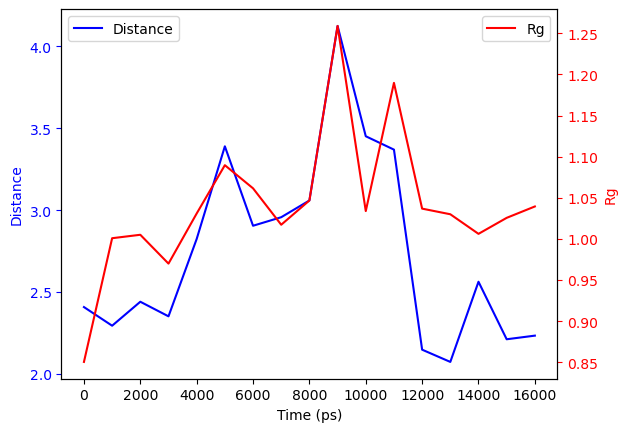

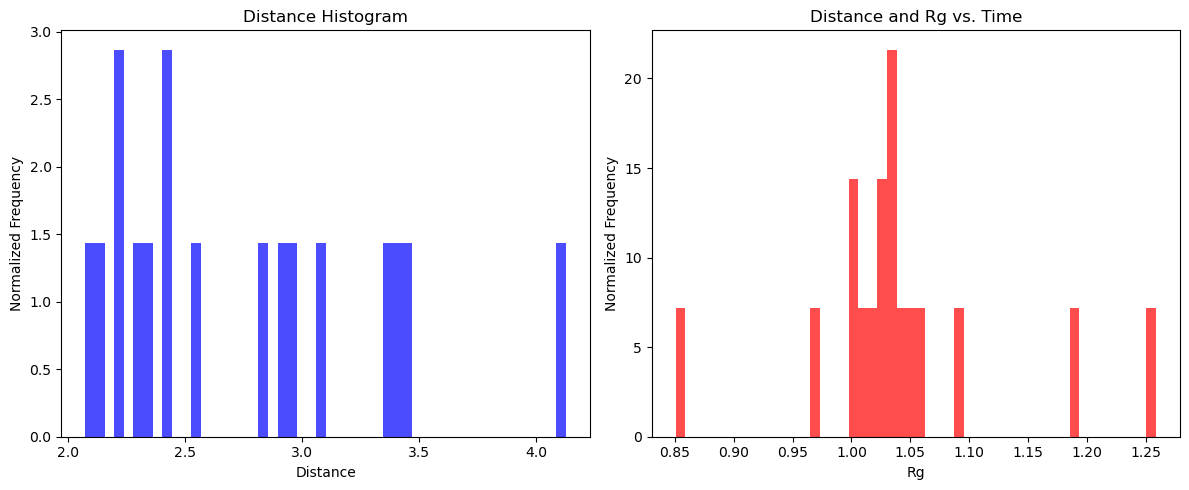

In [10]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

# Load the trajectory
trajectory_file = '/scratch/work/courses/CHEM-GA-2671-2023fa/students/sw4384/comp-lab-class-2023/Week2/Data/1hz3_T310.stepid25000000.every100ps.nowater.xtc'
topology_file = '/scratch/work/courses/CHEM-GA-2671-2023fa/students/sw4384/comp-lab-class-2023/Week2/Data/1hz3_T310.start.nowater.gro'

traj = md.load(trajectory_file, top=topology_file)

# Compute the distance between the first and last atom
def end_end(traj):
    first = traj.xyz[:, 0, :]
    last = traj.xyz[:, -1, :]
    dist = np.sqrt(np.sum((first - last) ** 2, axis=1))
    return dist

# Compute the distance between the first and last atom
dist = end_end(traj)

# Calculate the radius of gyration
Rg = md.compute_rg(traj)

# Plot distance vs. time and Rg vs. time on the same plot
fig, ax1 = plt.subplots()

# Plot distance on the left y-axis
ax1.plot(traj.time, dist, label='Distance', color='b')
ax1.set_xlabel('Time (ps)')
ax1.set_ylabel('Distance', color='b')
ax1.tick_params('y', colors='b')

# Create a second y-axis on the right for Rg
ax2 = ax1.twinx()
ax2.plot(traj.time, Rg, label='Rg', color='r')
ax2.set_ylabel('Rg', color='r')
ax2.tick_params('y', colors='r')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Create separate plots for distance and Rg histograms
plt.figure(figsize=(12, 5))

# Plot histogram for distance
plt.subplot(1, 2, 1)
plt.hist(dist, bins=50, density=True, color='b', alpha=0.7)
plt.xlabel('Distance')
plt.ylabel('Normalized Frequency')
plt.title('Distance Histogram')

# Plot histogram for Rg
plt.subplot(1, 2, 2)
plt.hist(Rg, bins=50, density=True, color='r', alpha=0.7)
plt.xlabel('Rg')
plt.ylabel('Normalized Frequency')
plt.title('Rg Histogram')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.title('Distance and Rg vs. Time')
plt.show()
